# NETWORK FOR COMPETITION: NOTE THAT KERAS IS USED AND IS THUS NOT A VALID ATTEMPT FOR THE COMPETETION
Since we have expererience with DL it seemed redundant to do it all from scatch and instead we used the time to get more familiar with DL libraries to get a better practical understanding of developing neural networks. Thus the results in this notebook are not eligble for competetion however they show the strength of leveraging a strong framework

In [11]:
#Load required packages
import numpy as np
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.datasets import mnist
from keras import backend as K

In [12]:
#Parameters
num_classes = 10
opt = "adam"
loss_f = 'categorical_crossentropy'
batch_size = 64
nb_epochs = 5

In [13]:
# Load Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [14]:
#Normalize data and turn to categorical

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float')
X_test = X_test.astype('float')
X_train = X_train / 255
X_test = X_test / 255

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

print(y_train.shape)
print(X_train.shape)
print(X_test.shape)

(60000, 10)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


/usr/local/lib/python3.5/dist-packages/keras/preprocessing/image.py:653: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 28, 28, 1) (1 channels).
  ' (' + str(x.shape[self.channel_axis]) + ' channels).')


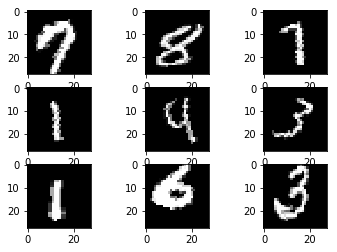

In [15]:
#Augment the input data to get more training data.
#Section is inspired by: https://machinelearningmastery.com/image-augmentation-deep-learning-keras/
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

datagen = ImageDataGenerator(rotation_range = 20, 
                             width_shift_range = 0.1,
                             height_shift_range = 0.1,
                             zoom_range=0.2)

datagen.fit(X_train)

#Show result
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()
    break
    
train_generator = datagen.flow(X_train, y_train, batch_size = batch_size)

#Define validation generator
test_gen = ImageDataGenerator()
test_generator = test_gen.flow(X_test, y_test, batch_size=batch_size)

In [16]:
#Define model.
#We use two convolutional blocks, which both contains two convolutinal
#with maxpooling at the end. Finally put result into a dense layer.
model = Sequential()

#First conv layer
model.add(Convolution2D(32, (3, 3), input_shape = (28,28, 1)))
model.add(BatchNormalization(axis=-1))
model.add(Activation("relu"))
model.add(Convolution2D(32, (3,3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#Second conv layer
model.add(Convolution2D(64, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation("relu"))
model.add(Convolution2D(64, (3,3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))



#Dense layers
model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_7 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_7 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_8 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
__________

In [17]:
#Compile the model
model.compile(loss=loss_f,
              optimizer=opt,
              metrics=['accuracy'])

In [18]:
#Fit the model
model.fit_generator(train_generator, 
                    steps_per_epoch = len(X_train) / batch_size,
                    epochs = nb_epochs,
                    validation_data = test_generator,
                    validation_steps = len(y_test)/ batch_size)

Epoch 1/5
938/937 [==============================] - 150s - loss: 0.2314 - acc: 0.9276 - val_loss: 0.0370 - val_acc: 0.9870
Epoch 2/5
938/937 [==============================] - 125s - loss: 0.0985 - acc: 0.9692 - val_loss: 0.0307 - val_acc: 0.9884
Epoch 3/5
938/937 [==============================] - 129s - loss: 0.0812 - acc: 0.9750 - val_loss: 0.0338 - val_acc: 0.9887
Epoch 4/5
938/937 [==============================] - 128s - loss: 0.0697 - acc: 0.9781 - val_loss: 0.0230 - val_acc: 0.9924
Epoch 5/5
938/937 [==============================] - 127s - loss: 0.0646 - acc: 0.9798 - val_loss: 0.0250 - val_acc: 0.9926


In [19]:
#Evaluate performance of model
score = model.evaluate(X_test, y_test, verbose=0)
print(score[1])

0.9921
